<a href="https://colab.research.google.com/github/myusuf1982/Prediksi-Saham/blob/main/2_input_lstm_OK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

In [98]:
# load data
data = pd.read_csv("/content/drive/My Drive/GOOG-year.csv")
data =data[:15] # Juml row maksimal yang mau diambil sample 15 row

# memilih kolom open dan close saja
data = data[['Open', 'Close','High']]   # all = Tanggal,Open,High,Low,Close,Adj Close,Volume

data.head(3)

,Open,Close,High
0,778.200012,768.700012,781.650024
1,767.250000,762.130005,769.950012
2,750.659973,762.020020,770.359985


In [112]:
# membuat skala data
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)


# membuat dataset dengan 90% data training dan 10% data testing
train_size = int(len(data) * 0.9)
train_data = data[:train_size] # 90% = 226

test_data = data[train_size:]
print(test_data)

# membuat dataset dengan input dan output
def create_dataset(data, look_back=1):
    dataX, dataY = [], []
    for i in range(len(data) - look_back): # print(len(data)) =252
        dataX.append(data[i:(i + look_back),:])
        dataY.append(data[i + look_back, :])
    return np.array(dataX), np.array(dataY)

# membuat dataset dengan input 2 hari sebelumnya dan output hari berikutnya
look_back = 2
trainX, trainY = create_dataset(train_data, look_back) #226,2
testX, testY = create_dataset(test_data, look_back)   #252,2


[[0.35384637 0.60848795 0.3136339 ]
 [0.5805436  0.59140193 0.50578397]]


Epoch 1/3
11/11 [==============================] - 2s 3ms/step - loss: 0.2766
Epoch 2/3
11/11 [==============================] - 0s 3ms/step - loss: 0.2557
Epoch 3/3
1/1 [==============================] - 0s 432ms/step


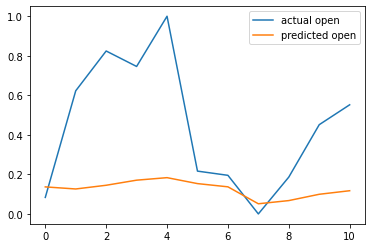

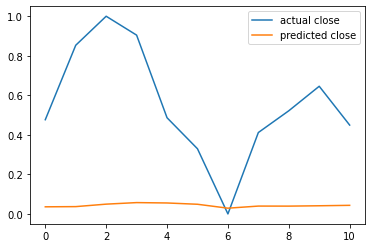

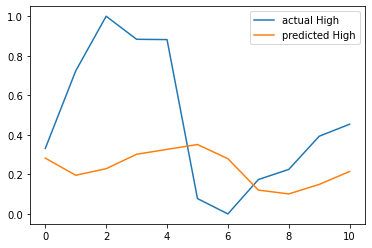

In [113]:
# membuat model LSTM
model = Sequential()
model.add(LSTM(8, input_shape=(look_back, 3))) # jumlah kolom
model.add(Dense(3))
model.compile(loss='mean_squared_error', optimizer='adam')

# melatih model dengan data training
model.fit(trainX, trainY, epochs=3, batch_size=1, verbose=1)

# melakukan prediksi dengan data testing
trainPredict = model.predict(trainX)
#testPredict = model.predict(testX)                                      #error

# inverting data kembali ke nilai asli
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform(trainY)
#testPredict = scaler.inverse_transform(testPredict)                       #Error
#testY = scaler.inverse_transform(testY)                              #error

# plot hasil prediksi dengan data training
plt.plot(trainY[:,0], label='actual open')
plt.plot(trainPredict[:,0], label='predicted open')
plt.legend()
plt.show()

plt.plot(trainY[:,1], label='actual close')
plt.plot(trainPredict[:,1], label='predicted close')
plt.legend()
plt.show()

plt.plot(trainY[:,2], label='actual High')
plt.plot(trainPredict[:,2], label='predicted High')
plt.legend()
plt.show()

# plot hasil prediksi dengan data testing



In [ ]:
train_size = int(len(data) * 0.7)
print(train_size)

2
